# MNIST arch exploration

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *

In [3]:
from fastai.utils.mem import *

In [66]:
gpu_mem_get_free_no_cache()

281

In [5]:
path = untar_data(URLs.MNIST)

In [6]:
path.ls()

[PosixPath('/home/jupyter/.fastai/data/mnist_png/models'),
 PosixPath('/home/jupyter/.fastai/data/mnist_png/training'),
 PosixPath('/home/jupyter/.fastai/data/mnist_png/testing')]

In [7]:
(path/'training').ls()

[PosixPath('/home/jupyter/.fastai/data/mnist_png/training/9'),
 PosixPath('/home/jupyter/.fastai/data/mnist_png/training/7'),
 PosixPath('/home/jupyter/.fastai/data/mnist_png/training/2'),
 PosixPath('/home/jupyter/.fastai/data/mnist_png/training/6'),
 PosixPath('/home/jupyter/.fastai/data/mnist_png/training/1'),
 PosixPath('/home/jupyter/.fastai/data/mnist_png/training/4'),
 PosixPath('/home/jupyter/.fastai/data/mnist_png/training/5'),
 PosixPath('/home/jupyter/.fastai/data/mnist_png/training/0'),
 PosixPath('/home/jupyter/.fastai/data/mnist_png/training/8'),
 PosixPath('/home/jupyter/.fastai/data/mnist_png/training/3')]

In [8]:
(path/'testing').ls()

[PosixPath('/home/jupyter/.fastai/data/mnist_png/testing/9'),
 PosixPath('/home/jupyter/.fastai/data/mnist_png/testing/7'),
 PosixPath('/home/jupyter/.fastai/data/mnist_png/testing/2'),
 PosixPath('/home/jupyter/.fastai/data/mnist_png/testing/6'),
 PosixPath('/home/jupyter/.fastai/data/mnist_png/testing/1'),
 PosixPath('/home/jupyter/.fastai/data/mnist_png/testing/4'),
 PosixPath('/home/jupyter/.fastai/data/mnist_png/testing/5'),
 PosixPath('/home/jupyter/.fastai/data/mnist_png/testing/0'),
 PosixPath('/home/jupyter/.fastai/data/mnist_png/testing/8'),
 PosixPath('/home/jupyter/.fastai/data/mnist_png/testing/3')]

In [9]:
data = ImageDataBunch.from_folder(path, train='training', valid='testing')

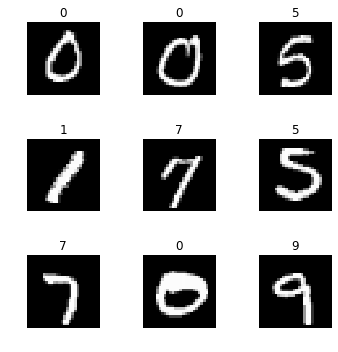

In [10]:
data.show_batch(3, figsize=(5,5))

In [11]:
# data.normalize()

In [12]:
data.one_batch()[0].shape

torch.Size([64, 3, 28, 28])

In [15]:
type(data)

fastai.vision.data.ImageDataBunch

In [18]:
1 + 1

2

In [15]:
def conv(i, o):
    return nn.Conv2d(i, o, kernel_size=3, stride=2, padding=1)

In [36]:
arch = nn.Sequential(
    conv(3, 6), # 14
#     nn.BatchNorm2d(6),
    nn.ReLU(),
    conv(6, 12), # 7
#     nn.BatchNorm2d(12),
    nn.ReLU(),
    conv(12, 24), # 4
#     nn.BatchNorm2d(24),
    nn.ReLU(),
    conv(24, 10), # 2
#     nn.BatchNorm2d(10),
    Flatten()
)

In [28]:
arch

Sequential(
  (0): Conv2d(3, 6, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (1): BatchNorm2d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU()
  (3): Conv2d(6, 12, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (4): BatchNorm2d(12, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (5): ReLU()
  (6): Conv2d(12, 24, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (7): BatchNorm2d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (8): ReLU()
  (9): Conv2d(24, 10, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (10): BatchNorm2d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (11): Flatten()
)

In [37]:
learn = Learner(data, arch, loss_func=nn.CrossEntropyLoss(), metrics=accuracy)

In [38]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


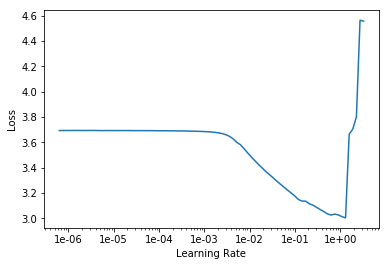

In [39]:
learn.recorder.plot()

In [40]:
learn.fit_one_cycle(1, 1e-1)

epoch,train_loss,valid_loss,accuracy,time
1,0.311138,0.285822,0.911900,00:09


In [42]:
print(learn.summary())

Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [1, 6, 14, 14]       168        True      
______________________________________________________________________
ReLU                 [1, 6, 14, 14]       0          False     
______________________________________________________________________
Conv2d               [1, 12, 7, 7]        660        True      
______________________________________________________________________
ReLU                 [1, 12, 7, 7]        0          False     
______________________________________________________________________
Conv2d               [1, 24, 4, 4]        2,616      True      
______________________________________________________________________
ReLU                 [1, 24, 4, 4]        0          False     
______________________________________________________________________
Conv2d               [1, 10, 2, 2]        2,170      True      
______________________________________________________________

In [47]:
arch = nn.Sequential(
    conv(3, 6), # 14
    nn.BatchNorm2d(6),
    nn.ReLU(),
    conv(6, 12), # 7
    nn.BatchNorm2d(12),
    nn.ReLU(),
    conv(12, 24), # 4
    nn.BatchNorm2d(24),
    nn.ReLU(),
    conv(24, 24), # 2
    nn.BatchNorm2d(24),
    nn.ReLU(),
    conv(24, 10), # 1
    nn.BatchNorm2d(10),
    Flatten()
)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


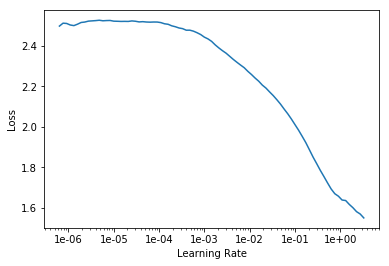

In [48]:
learn = Learner(data, arch, loss_func=nn.CrossEntropyLoss(), metrics=accuracy)
learn.lr_find()
learn.recorder.plot()

In [50]:
learn.fit_one_cycle(1, 3e-1)

epoch,train_loss,valid_loss,accuracy,time
1,0.092539,0.054598,0.981200,00:12


In [51]:
print(learn.summary())

Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [1, 6, 14, 14]       168        True      
______________________________________________________________________
BatchNorm2d          [1, 6, 14, 14]       12         True      
______________________________________________________________________
ReLU                 [1, 6, 14, 14]       0          False     
______________________________________________________________________
Conv2d               [1, 12, 7, 7]        660        True      
______________________________________________________________________
BatchNorm2d          [1, 12, 7, 7]        24         True      
______________________________________________________________________
ReLU                 [1, 12, 7, 7]        0          False     
______________________________________________________________________
Conv2d               [1, 24, 4, 4]        2,616      True      
______________________________________________________________

In [52]:
arch = nn.Sequential(
    conv_layer(3, 6, stride=2), # 14
    conv_layer(6, 12, stride=2), # 7
    conv_layer(12, 24, stride=2), # 4
    conv_layer(24, 24, stride=2), # 2
    conv_layer(24, 10, stride=2), # 1
    Flatten()
)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


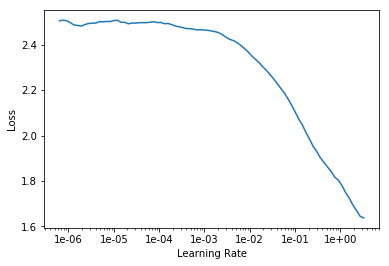

In [53]:
learn = Learner(data, arch, loss_func=nn.CrossEntropyLoss(), metrics=accuracy)
learn.lr_find()
learn.recorder.plot()

In [54]:
learn.fit_one_cycle(1, 3e-1)

epoch,train_loss,valid_loss,accuracy,time
1,0.103678,0.057507,0.981200,00:12


In [55]:
learn.fit_one_cycle(5, 3e-1)

epoch,train_loss,valid_loss,accuracy,time
1,0.190102,0.166092,0.946900,00:11
2,0.180216,0.179625,0.949000,00:11
3,0.150205,0.127847,0.959700,00:11
4,0.078240,0.074317,0.976200,00:11
5,0.046682,0.037114,0.988300,00:11


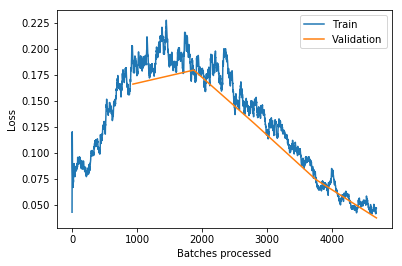

In [56]:
learn.recorder.plot_losses()

In [57]:
learn.fit_one_cycle(5, 3e-2)

epoch,train_loss,valid_loss,accuracy,time
1,0.057998,0.042857,0.987500,00:11
2,0.061342,0.048162,0.985000,00:11
3,0.050660,0.044850,0.987300,00:11
4,0.031611,0.035720,0.989000,00:11
5,0.020141,0.034272,0.990300,00:11


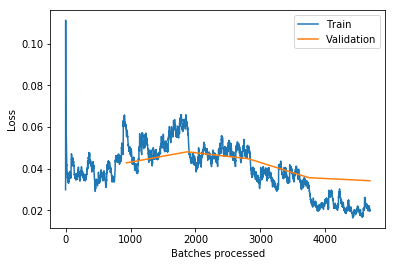

In [58]:
learn.recorder.plot_losses()

In [59]:
class ResBlock(nn.Module):
    def __init__(self, nf):
        super().__init__()
        self.conv1 = conv_layer(nf, nf)
        self.conv2 = conv_layer(nf, nf)
        
    def forward(self, x):
        return x + self.conv1(self.conv2(x))

In [60]:
arch = nn.Sequential(
    conv_layer(3, 6, stride=2), # 14
    ResBlock(6),
    conv_layer(6, 12, stride=2), # 7
    ResBlock(12),
    conv_layer(12, 24, stride=2), # 4
    ResBlock(24),
    conv_layer(24, 24, stride=2), # 2
    ResBlock(24),
    conv_layer(24, 10, stride=2), # 1
    ResBlock(10),
    Flatten()
)

/opt/anaconda3/lib/python3.7/site-packages/torch/serialization.py:251: UserWarning: Couldn't retrieve source code for container of type ResBlock. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


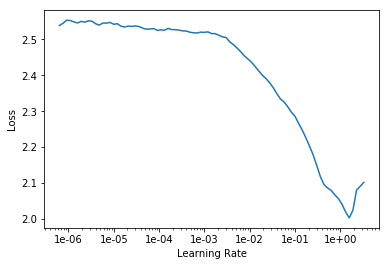

In [61]:
learn = Learner(data, arch, loss_func=nn.CrossEntropyLoss(), metrics=accuracy)
learn.lr_find()
learn.recorder.plot()

In [62]:
learn.fit_one_cycle(1, 3e-1)

epoch,train_loss,valid_loss,accuracy,time
1,0.077223,0.049831,0.983400,00:15


In [63]:
print(learn.summary())

Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [1, 6, 14, 14]       162        True      
______________________________________________________________________
ReLU                 [1, 6, 14, 14]       0          False     
______________________________________________________________________
BatchNorm2d          [1, 6, 14, 14]       12         True      
______________________________________________________________________
Conv2d               [1, 6, 14, 14]       324        True      
______________________________________________________________________
ReLU                 [1, 6, 14, 14]       0          False     
______________________________________________________________________
BatchNorm2d          [1, 6, 14, 14]       12         True      
______________________________________________________________________
Conv2d               [1, 6, 14, 14]       324        True      
______________________________________________________________

In [64]:
learn.fit_one_cycle(5, 3e-2)

epoch,train_loss,valid_loss,accuracy,time
1,0.071024,0.065646,0.979100,00:16
2,0.064409,0.078518,0.976100,00:16
3,0.060736,0.042919,0.985300,00:18
4,0.032952,0.027887,0.990000,00:16
5,0.021187,0.023634,0.992100,00:16


In [65]:
learn.fit_one_cycle(5, 3e-3)

epoch,train_loss,valid_loss,accuracy,time
1,0.020654,0.024861,0.991800,00:17
2,0.018845,0.024641,0.992300,00:19
3,0.017017,0.025103,0.991600,00:19
4,0.017415,0.024940,0.991700,00:18
5,0.012938,0.025474,0.991800,00:16
